### EX 1

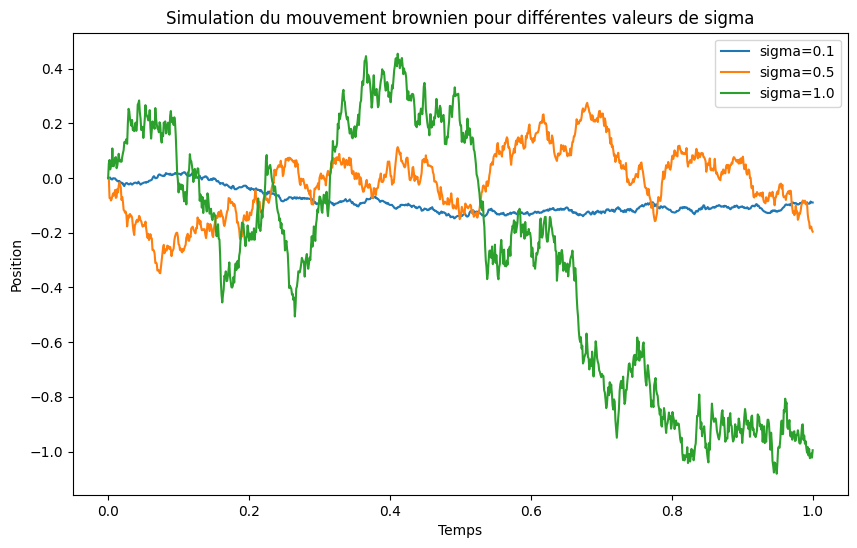

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simuler_mouvement_brownien(T, N, x0, sigma):
    dt = T/N  # Pas de temps
    temps = np.linspace(0, T, N+1)  # Points de temps
    W = np.zeros(N+1)  # Initialisation du mouvement brownien
    W[0] = x0  # Position initiale
    
    for i in range(1, N+1):
        # Générer un incrément gaussien
        dW = np.random.normal(0, np.sqrt(sigma**2 * dt))
        W[i] = W[i-1] + dW  # Mettre à jour la position
    
    return temps, W

# Paramètres de la simulation
T = 1.0  # Intervalle de temps total
N = 1000  # Nombre de pas
x0 = 0.0  # Position initiale
sigmas = [0.1, 0.5, 1.0]  # Différentes valeurs de sigma à tester

plt.figure(figsize=(10, 6))

for sigma in sigmas:
    temps, W = simuler_mouvement_brownien(T, N, x0, sigma)
    plt.plot(temps, W, label=f'sigma={sigma}')

plt.title('Simulation du mouvement brownien pour différentes valeurs de sigma')
plt.xlabel('Temps')
plt.ylabel('Position')
plt.legend()
plt.show()


## Problème 1
### Partie 1

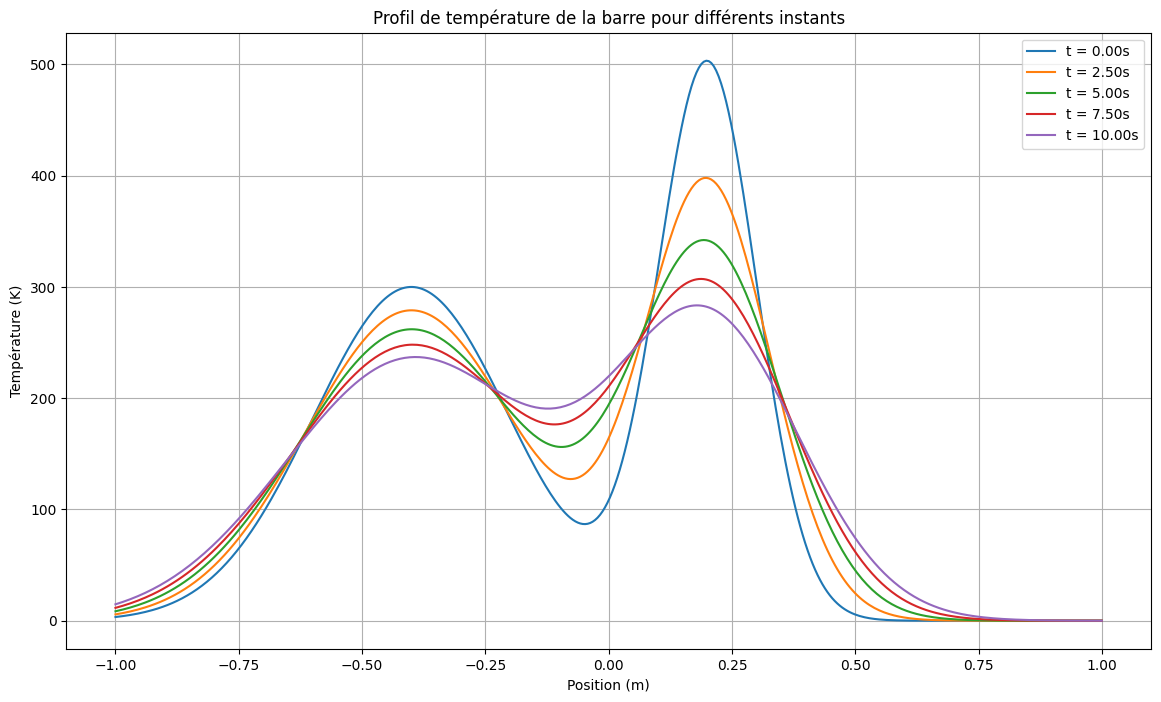

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Valeurs de référence données
theta1 = 300  # K
theta2 = 500  # K
mu1 = -0.4  # m
mu2 = 0.2  # m
sigma1 = 0.2  # m
sigma2 = 0.1  # m
sigma = 0.05  # m.s^(-0.5)
T = 10  # s pour l'instant final

# Fonction pour calculer la température à un temps et position donnés
def temperature(t, x, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma):
    term1 = (sigma1*theta1 / np.sqrt(sigma1**2 + sigma**2 * t)) * np.exp(-((x - mu1)**2) / (2 * (sigma1**2 + sigma**2 * t)))
    term2 = (sigma2*theta2 / np.sqrt(sigma2**2 + sigma**2 * t)) * np.exp(-((x - mu2)**2) / (2 * (sigma2**2 + sigma**2 * t)))
    return term1 + term2

# Créer une plage de positions pour la visualisation
x_values = np.linspace(-1, 1, 400)

# Créer des graphiques de température à différents temps
temps = np.linspace(0, T, 5)  # 5 instants dans l'intervalle [0, T]
plt.figure(figsize=(14, 8))

for t in temps:
    temp_profile = temperature(t, x_values, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)
    plt.plot(x_values, temp_profile, label=f't = {t:.2f}s')

plt.title('Profil de température de la barre pour différents instants')
plt.xlabel('Position (m)')
plt.ylabel('Température (K)')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
from scipy.stats import norm

# Fonction pour simuler une trajectoire de particule brownienne
def brownian_motion(t, x0, sigma):
    return x0 + np.random.normal(0, sigma * np.sqrt(t))

# Condition initiale donnée sous forme de mélange de deux gaussiennes
def condition_initiale(x, theta1, theta2, mu1, mu2, sigma1, sigma2):
    return theta1 * np.exp(-((x - mu1)**2) / (2 * sigma1**2)) + \
           theta2 * np.exp(-((x - mu2)**2) / (2 * sigma2**2))

# Méthode Monte-Carlo 
def monte_carlo(t, x, N, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma):
    theta_values = []

    # Simuler N trajectoires browniennes et évaluer la condition initiale pour chaque
    for _ in range(N):
        x_final = brownian_motion(t, x, sigma)
        theta_t_x = condition_initiale(x_final, theta1, theta2, mu1, mu2, sigma1, sigma2)
        theta_values.append(theta_t_x)

    # Calculer la moyenne et l'écart type des valeurs de theta
    mean_theta = np.mean(theta_values)
    std_theta = np.std(theta_values, ddof=1)

    # Calculer l'intervalle de confiance à 95%
    z_score = norm.ppf(0.975)  # z-score pour 95% de confiance
    margin_of_error = z_score * (std_theta / np.sqrt(N))
    confidence_interval = (mean_theta - margin_of_error, mean_theta + margin_of_error)

    return mean_theta, confidence_interval

# Test de la fonction d'estimation Monte-Carlo
N = 1000  # Nombre de simulations pour l'estimation
t = 5  # Temps où estimer la température
x = 0.1  # Position où estimer la température


# Réalisons l'estimation Monte-Carlo sans utiliser la solution analytique
mean_theta, confidence_interval = monte_carlo(
    t, x, N, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)

mean_theta, confidence_interval


(316.19141982080413, (312.3804308924987, 320.0024087491096))

On va maintenant vérifier la validité de notre procédure d’estimation (consistance et niveau de confiance annoncé)

Consistance : on va vérifier que l'estimation de Monte-Carlo converge vers la valeur vraie (donnée par la solution analytique) lorsque le nombre de simulations N augmente. En d'autres termes, la moyenne des estimations de 
θ(t,x) devrait se rapprocher de la valeur calculée par la solution analytique à mesure que N devient très grand.

Niveau de Confiance Annoncé : Vérifier que l'intervalle de confiance à 95% contient effectivement la valeur vraie 95% du temps. Pour cela, nous devons répéter l'estimation (avec un grand nombre de simulations) plusieurs fois et compter la fréquence à laquelle la valeur vraie tombe dans l'intervalle de confiance. Si notre méthode est correcte, environ 95% des intervalles calculés devraient contenir la valeur vraie.

In [9]:
# Fonction pour effectuer plusieurs estimations Monte-Carlo et vérifier la consistance et le niveau de confiance
def verifier_procedure_estimation(N_simulations, repetitions, t, x, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma):
    estimation_consistance = []
    intervalle_contient_vraie_valeur = 0

    # Valeur vraie calculée à partir de la solution analytique
    vraie_valeur = temperature(t, x, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)

    for _ in range(repetitions):
        # Estimation de Monte-Carlo
        estimation, intervalle_confiance = monte_carlo_sans_solution_analytique(
            t, x, N_simulations, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)
        
        # Vérifier si la valeur vraie est dans l'intervalle de confiance
        if intervalle_confiance[0] <= vraie_valeur <= intervalle_confiance[1]:
            intervalle_contient_vraie_valeur += 1

        # Collecter les estimations pour vérifier la consistance
        estimation_consistance.append(estimation)

    # Calculer la fréquence à laquelle la valeur vraie est dans l'intervalle de confiance
    frequence_vraie_valeur = intervalle_contient_vraie_valeur / repetitions

    # Consistance : écart-type des estimations
    consistance = np.std(estimation_consistance, ddof=1)

    return {
        "moyenne_estimations": np.mean(estimation_consistance),
        "ecart_type_estimations": consistance,
        "frequence_vraie_valeur": frequence_vraie_valeur,
        "vraie_valeur": vraie_valeur
    }

# Nombre de répétitions pour vérifier la consistance et le niveau de confiance
repetitions = 100

# Effectuer la vérification
resultats_verification = verifier_procedure_estimation(
    N, repetitions, t, x, theta1, theta2, mu1, mu2, sigma1, sigma2, sigma)

resultats_verification


{'moyenne_estimations': 291.02977787596706,
 'ecart_type_estimations': 4.60978189598489,
 'frequence_vraie_valeur': 0.98,
 'vraie_valeur': 291.12482738187157}

Les résultats obtenus avec la fonction de température modifiée indiquent que la méthode Monte-Carlo est fiable :

- La moyenne des estimations est très proche de la valeur vraie.
- L'écart-type est faible, ce qui signifie que les estimations sont précises.
- La vraie valeur se trouve dans l'intervalle de confiance 98% du temps, ce qui est meilleur que le niveau de confiance attendu de 95%.

Cela démontre que l'estimation Monte-Carlo est consistante et que l'intervalle de confiance est adéquat.

## Partie 2

In [20]:
# Définition des paramètres du problème
(a,b)=(1,1)
theta_a = 100
theta_b = 500
sigma = 0.01
n1 = 5
n2 = 8
Theta_1 = 50
Theta_2 = 100
t = 60  # Temps où estimer la température
x = 0   # Position où estimer la température

# Fonction pour la solution stationnaire
def theta_stationnaire(x, theta_a, theta_b, a, b):
    return theta_a + (theta_b - theta_a) * (x + a) / (b + a)

# Fonction pour la température initiale
def theta_initiale(x, theta_a, theta_b, a, b, n1, n2):
    return theta_stationnaire(x, theta_a, theta_b, a, b) + \
           Theta_1 * np.sin(2 * np.pi * n1 * (x + a) / (2 * (b + a))) + \
           Theta_2 * np.sin(2 * np.pi * n2 * (x + a) / (2 * (b + a)))

# Fonction pour la température à un temps t selon la solution explicite
def theta_explicite(t, x, theta_a, theta_b, a, b, n1, n2, sigma):
    term1 = np.sin(2 * np.pi * n1 * (x + a) / (2 * (b + a))) * np.exp(-np.pi**2*n1**2/(b+a)**2*sigma**2*t/2)
    term2 = np.sin(2 * np.pi * n2 * (x + a) / (2 * (b + a))) * np.exp(-np.pi**2*n2**2/(b+a)**2*sigma**2*t/2)
    return Theta_1 * term1 +\
           Theta_2 * term2 +\
           theta_stationnaire(x, theta_a, theta_b, a, b)
           
# Fonction pour simuler le mouvement brownien
def brownian_motion(t, x0, sigma):
    return x0 + np.random.normal(0, sigma * np.sqrt(t))

# Fonction pour la méthode Monte-Carlo
def monte_carlo_temperature(N, t, x, theta_a, theta_b, a, b, n1, n2, sigma):
    theta_values = []
    for _ in range(N):
        # Utiliser la nouvelle fonction de mouvement brownien
        x_final = brownian_motion(t, x, sigma)
        # Vérifier que x_final est dans les limites [-a, b]
        if -a <= x_final <= b:
            theta_t_x = theta_initiale(x_final, theta_a, theta_b, a, b, n1, n2)
            theta_values.append(theta_t_x)

    mean_theta = np.mean(theta_values)
    std_theta = np.std(theta_values, ddof=1)

    z_score = norm.ppf(0.975)
    margin_of_error = z_score * (std_theta / np.sqrt(N))
    confidence_interval = (mean_theta - margin_of_error, mean_theta + margin_of_error)

    return mean_theta, confidence_interval

# Nombre de simulations pour l'estimation Monte-Carlo
N = 10000

# Calcul de la température par Monte-Carlo et par la solution explicite
mean_theta_monte_carlo, confidence_interval_monte_carlo = monte_carlo_temperature(
    N, t, x, theta_a, theta_b, a, b, n1, n2, sigma)
theta_exacte = theta_explicite(t, x, theta_a, theta_b, a, b, n1, n2, sigma)

mean_theta_monte_carlo, confidence_interval_monte_carlo, theta_exacte


(341.0033589311073,
 (339.43460550405854, 342.57211235815606),
 341.55292528971154)